In [1]:
import numpy as np
import pandas as pd

In [2]:
import neurokit2 as nk

In [3]:
# neurokit download example data for test
data = nk.data("bio_eventrelated_100hz")
data

,ECG,EDA,Photosensor,RSP
0,-0.015869,13.196868,5.0,0.778931
1,-0.011703,13.197173,5.0,0.777588
2,-0.009766,13.197020,5.0,0.777435
3,-0.013321,13.197631,5.0,0.777557
4,-0.009583,13.196715,5.0,0.775299
...,...,...,...,...
14995,-0.007675,14.873656,5.0,1.351868
14996,-0.005203,14.873961,5.0,1.356689
14997,-0.004272,14.874266,5.0,1.361938
14998,-0.000458,14.875335,5.0,1.366821


In [4]:
processed_data, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)
processed_data

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,...,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime,RSA_P2T,RSA_Gates
0,-0.015869,0.001499,60.858467,0.618631,0,0,0,0,0,0,...,0.094612,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
1,-0.011703,0.004621,60.858467,0.618631,0,0,0,0,0,0,...,0.093571,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
2,-0.009766,0.005260,60.858467,0.618631,0,0,0,0,0,0,...,0.092546,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
3,-0.013321,0.004423,60.858467,0.618631,0,0,0,0,0,0,...,0.091549,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
4,-0.009583,0.005670,60.858467,0.618631,0,0,0,0,0,0,...,0.090593,0,0,0.0,0.0,0.0,0,0.0,0.09,8.372156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.007675,0.011875,56.603774,0.378818,0,0,0,0,0,0,...,0.014949,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065
14996,-0.005203,0.011978,56.603774,0.378818,0,0,0,0,0,0,...,0.013793,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065
14997,-0.004272,0.012345,56.603774,0.378818,0,0,0,0,0,0,...,0.012826,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065
14998,-0.000458,0.012854,56.603774,0.378818,0,0,0,0,0,0,...,0.012049,0,0,0.0,0.0,0.0,0,0.0,0.04,8.741065


In [5]:
info

{'ECG_R_Peaks': array([   49,   146,   245,   348,   443,   531,   623,   720,   821,
          911,  1012,  1118,  1227,  1327,  1440,  1556,  1659,  1762,
         1861,  1951,  2053,  2158,  2252,  2350,  2449,  2547,  2647,
         2758,  2857,  2955,  3054,  3145,  3239,  3338,  3438,  3531,
         3629,  3726,  3818,  3915,  4014,  4107,  4200,  4294,  4381,
         4464,  4546,  4624,  4701,  4801,  4891,  4987,  5089,  5191,
         5285,  5383,  5484,  5578,  5673,  5774,  5872,  5974,  6086,
         6183,  6283,  6385,  6475,  6567,  6663,  6747,  6826,  6909,
         6992,  7080,  7171,  7268,  7367,  7457,  7549,  7644,  7734,
         7819,  7907,  7996,  8086,  8178,  8283,  8383,  8478,  8585,
         8696,  8794,  8904,  9013,  9113,  9220,  9331,  9429,  9532,
         9639,  9738,  9839,  9947, 10052, 10149, 10256, 10363, 10456,
        10563, 10679, 10785, 10886, 10999, 11102, 11211, 11314, 11410,
        11513, 11614, 11703, 11786, 11869, 11954, 12048, 12157

In [6]:
# Compute relevant features
results = nk.bio_analyze(processed_data, sampling_rate=100)
results

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,RSA_P2T_Mean,RSA_P2T_Mean_log,RSA_P2T_SD,RSA_P2T_NoRSA,RSA_PorgesBohrer,RSA_Gates_Mean,RSA_Gates_Mean_log,RSA_Gates_SD
0,60.896029,985.89404,84.925626,NaN,NaN,NaN,NaN,NaN,NaN,72.924619,...,9.0,1.618542,0.075135,-2.588467,0.071166,2.0,-5.647619,8.433517,2.132214,0.167126


In [8]:
eeg = nk.mne_data("filt-0-40_raw")
eeg

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 41700 (277.7 s), ~21.7 MB, data loaded>

In [9]:
bads, info = nk.eeg_badchannels(eeg, distance_threshold=0.95, show=False)

In [11]:
info

,SD,Mean,MAD,Median,Skewness,Kurtosis,Amplitude,CI_low,CI_high,n_ZeroCrossings,Bad
Channel,,,,,,,,,,,
0,0.000034,-1.313840e-07,0.000015,-3.691241e-06,0.858427,18.394849,0.000568,-0.000044,0.000042,5191,0.4
1,0.000035,9.097784e-06,0.000014,5.151002e-06,0.808571,18.401426,0.000563,-0.000035,0.000050,3409,0.3
2,0.000035,1.572686e-05,0.000014,1.138525e-05,1.032899,17.316216,0.000557,-0.000030,0.000055,3339,0.4
3,0.000030,2.300400e-05,0.000018,2.008280e-05,1.010853,12.090530,0.000453,-0.000018,0.000059,5075,0.5
4,0.000029,2.319440e-05,0.000015,2.033410e-05,0.776701,13.916866,0.000436,-0.000015,0.000059,3969,0.3
5,0.000029,1.241328e-05,0.000015,9.239497e-06,0.873817,14.900602,0.000471,-0.000024,0.000050,3943,0.1
6,0.000034,1.013046e-05,0.000016,5.856566e-06,1.419716,14.993791,0.000534,-0.000031,0.000049,5477,0.3
7,0.000031,3.023150e-05,0.000016,2.770867e-05,2.946866,23.874952,0.000484,-0.000006,0.000063,5149,0.8
8,0.000023,2.633718e-05,0.000013,2.454843e-05,0.243612,12.750520,0.000345,-0.000004,0.000056,6131,0.5


In [10]:
bads

['EEG 004', 'EEG 008', 'EEG 009']

## Some testing with ECG data using the library

In [12]:
# Generate 15 seconds of ECG signal (recorded at 250 samples/second)
ecg = nk.ecg_simulate(duration=15, sampling_rate=250, heart_rate=70)
ecg

array([ 1.09723069,  1.04226718,  0.90005606, ..., -0.11886268,
       -0.11936399, -0.11973745])

In [13]:
# Process the signal
signals, info = nk.ecg_process(ecg, sampling_rate=250)
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,1.097231,-0.073209,70.011669,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,1.042267,-0.201301,70.011669,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.900056,-0.342328,70.011669,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,0.698529,-0.500599,70.011669,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,0.467399,-0.672628,70.011669,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,-0.117361,-0.070971,70.093458,0.689065,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3746,-0.118205,-0.066959,70.093458,0.689065,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3747,-0.118863,-0.062694,70.093458,0.689065,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3748,-0.119364,-0.058247,70.093458,0.689065,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [14]:
info

{'ECG_R_Peaks': array([ 209,  425,  644,  857, 1068, 1282, 1498, 1713, 1928, 2143, 2356,
        2567, 2783, 3000, 3211, 3423, 3637]),
 'sampling_rate': 250}

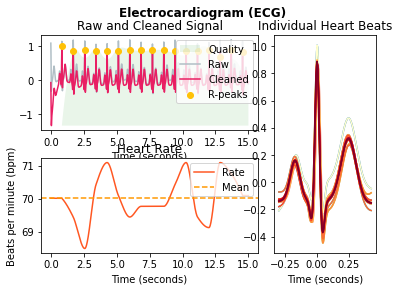

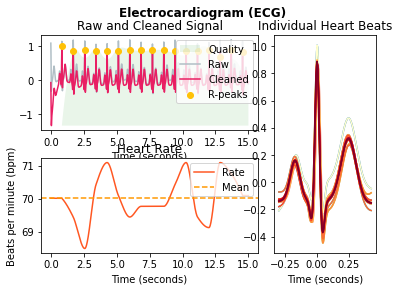

In [15]:
nk.ecg_plot(signals, sampling_rate=250)